In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-07 17:05:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  3.62MB/s    in 0.2s    

2025-11-07 17:05:25 (3.62 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.head().T

,0,1,2,3,4
engine_displacement,170,130,170,220,210
num_cylinders,3.0,5.0,NaN,4.0,1.0
horsepower,159.0,97.0,78.0,NaN,140.0
vehicle_weight,3413.433759,3149.664934,3079.038997,2542.392402,3460.87099
acceleration,17.7,17.8,15.1,20.2,14.4
model_year,2003,2007,2018,2009,2009
origin,Europe,USA,Europe,USA,Europe
fuel_type,Gasoline,Gasoline,Gasoline,Diesel,Gasoline
drivetrain,All-wheel drive,Front-wheel drive,Front-wheel drive,All-wheel drive,All-wheel drive
num_doors,0.0,0.0,0.0,2.0,2.0


In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [9]:
df=df.fillna(0)

In [10]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [11]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [15]:
len(df_full_train), len(df_train), len(df_val),len(df_test)

(7763, 5822, 1941, 1941)

In [16]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [17]:
y_train=df_train['fuel_efficiency_mpg']
y_val=df_val['fuel_efficiency_mpg']
y_test=df_test['fuel_efficiency_mpg']

In [18]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

In [20]:
dv=DictVectorizer(sparse=True)

In [22]:
train_dicts=df_train.to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)
test_dicts=df_test.to_dict(orient='records')
X_test=dv.transform(test_dicts)
val_dicts=df_val.to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [24]:
dt=DecisionTreeRegressor(max_depth=1,random_state=1)
dt.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
y_pred=dt.predict(X_val)

In [26]:
y_pred

array([16.88218854, 16.88218854, 16.88218854, ..., 12.9383797 ,
       12.9383797 , 16.88218854], shape=(1941,))

In [27]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
from sklearn.metrics import mean_squared_error

In [33]:
rf=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_val)
rmse=mean_squared_error(y_val,y_pred)
print(math.sqrt(rmse))

0.4595777223092726


In [41]:
scores=[]
for n in range(10,201,10):
    rf=RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_val)
    mse=mean_squared_error(y_val,y_pred)
    rmse=math.sqrt(mse)
    scores.append((n,round(rmse,3)))

In [42]:
pd.DataFrame(scores)

,0,1
0,10,0.460
1,20,0.454
2,30,0.452
3,40,0.449
4,50,0.447
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.445


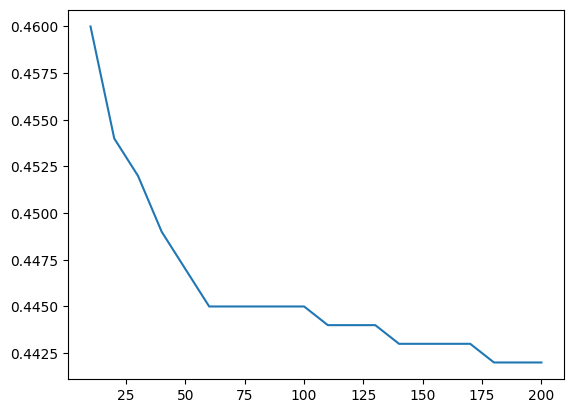

In [43]:
df_scores=pd.DataFrame(scores,columns=['n_estimators','rmse'])
plt.plot(df_scores['n_estimators'],df_scores['rmse'])

In [44]:
scores=[]
depth=[10,15,20,25]
for n in range(10,201,10):
  for d in depth:

    rf=RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred=rf.predict(X_val)
    mse=mean_squared_error(y_val, y_pred)
    rmse=math.sqrt(mse)
    scores.append((d,n, round(rmse,3)))

In [45]:
df_scores=pd.DataFrame(scores, columns=['depth','n_estimators','rmse'])

In [46]:
df_scores

,depth,n_estimators,rmse
0,10,10,0.450
1,15,10,0.458
2,20,10,0.459
3,25,10,0.459
4,10,20,0.447
...,...,...,...
75,25,190,0.443
76,10,200,0.440
77,15,200,0.442
78,20,200,0.443


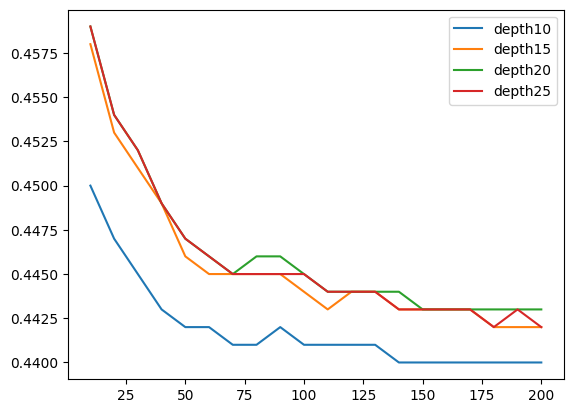

In [47]:
for d in [10,15,20,25]:
  df_subset=df_scores[df_scores.depth==d]
  plt.plot(df_subset['n_estimators'],df_subset['rmse'],label='depth%d'%d)
plt.legend()

In [48]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 34.3 MB/s eta 0:00:00m eta 0:00:010:0102
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 34.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [49]:
import xgboost as xgb

In [52]:
features=dv.get_feature_names_out().tolist()
dtrain=xgb.DMatrix(X_train,label=y_train,feature_names=features)
dval=xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [53]:
watchlist=[(dtrain,'train'),(dval,'val')]

In [61]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model=xgb.train(xgb_params, dtrain, evals=watchlist,num_boost_round=200)
key='min_child_weight=%s' % (xgb_params['min_child_weight'])

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va

In [60]:
evals_result = {}

model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=watchlist,
    evals_result=evals_result,
    verbose_eval=False
)

# Now you can get the RMSE directly:
final_rmse = evals_result['val']['rmse'][-1]
print("Final validation RMSE:", final_rmse)


Final validation RMSE: 0.4620315599151297


In [62]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model=xgb.train(xgb_params, dtrain, evals=watchlist,num_boost_round=200)
key='min_child_weight=%s' % (xgb_params['min_child_weight'])

[0]	train-rmse:2.28944	val-rmse:2.34561
[1]	train-rmse:2.07396	val-rmse:2.12434
[2]	train-rmse:1.88066	val-rmse:1.92597
[3]	train-rmse:1.70730	val-rmse:1.74987
[4]	train-rmse:1.55163	val-rmse:1.59059
[5]	train-rmse:1.41247	val-rmse:1.44988
[6]	train-rmse:1.28796	val-rmse:1.32329
[7]	train-rmse:1.17660	val-rmse:1.20930
[8]	train-rmse:1.07736	val-rmse:1.10830
[9]	train-rmse:0.98883	val-rmse:1.02009
[10]	train-rmse:0.91008	val-rmse:0.94062
[11]	train-rmse:0.84030	val-rmse:0.87100
[12]	train-rmse:0.77874	val-rmse:0.80916
[13]	train-rmse:0.72417	val-rmse:0.75465
[14]	train-rmse:0.67626	val-rmse:0.70780
[15]	train-rmse:0.63402	val-rmse:0.66672
[16]	train-rmse:0.59690	val-rmse:0.63062
[17]	train-rmse:0.56447	val-rmse:0.60016
[18]	train-rmse:0.53619	val-rmse:0.57383
[19]	train-rmse:0.51138	val-rmse:0.55044
[20]	train-rmse:0.48983	val-rmse:0.53064
[21]	train-rmse:0.47135	val-rmse:0.51451
[22]	train-rmse:0.45501	val-rmse:0.49998
[23]	train-rmse:0.44120	val-rmse:0.48790
[24]	train-rmse:0.42929	va

In [63]:
evals_result = {}

model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=watchlist,
    evals_result=evals_result,
    verbose_eval=False
)

# Now you can get the RMSE directly:
final_rmse = evals_result['val']['rmse'][-1]
print("Final validation RMSE:", final_rmse)


Final validation RMSE: 0.43151829489289734


In [64]:
features = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']
X = df[features]
y = df['fuel_efficiency_mpg']

rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rf.fit(X, y)


,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
importances = rf.feature_importances_

for f, imp in zip(features, importances):
    print(f"{f}: {imp:.4f}")


vehicle_weight: 0.9632
horsepower: 0.0182
acceleration: 0.0136
engine_displacement: 0.0051
